# Simple Linear Regression with Tensorflow
> In this post, it will cover Simple linear regression with tensorflow 2.x. Hypothesis and cost fuction will be also mentioned.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Tensorflow]
- image: images/linear_regression_epoch.png

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Hypothesis and cost function
**Hypothesis** is a sort of function that expect to represent the pattern of given data. It is usually expressed with some linear equation, but in this post, it will cover the simple linear regression, so the hypothesis may be simple linear equation like this,

$$ H(x) = W x + b $$

Here, $x$ is the given data, and $W$ is weight vector, and $b$ is bias. So the output $H(x)$ is the form of product weight vector and given data, adding bias. The purpose of hypothesis is to clearly represent the actual output($y$) with this formula. To do this, hypothesis should be same as actual output.

 Maybe the simple hypothesis can be drawn as line on 2D-space. But as you know that, it is hard to clearly represent all the data with given hypothesis. There're must be the error between the output of hypothesis and actual output. Through this process, we should find the way to minimize the error between them.
 
 **Cost** is the error I mentioned. Usually, lots of data is given, so the cost can be expressed with the average of error. And as you notice that, hypothesis is related on weight vector($W$) and bias($b$), so the cost can be described as a function:
 
 $$ \text{cost}(W, b) = {1 \over m} \sum_{i=1}^m (H(x_i) - y_i)^2 $$
 
 And there are lots of cost function in the world. The expression above is the **mean squared error**(MSE for short), cause we measure the error with **euclidean distance** ($(x-y)^2$). Maybe we can use the cost function with **mean absolute error**(MAE for short). Anyway, we'll use cost function with MSE.
 
So, we need to find the best $W$ and $b$ for minimizing the cost function. The process we try to find this is called **learning** or **training**.

## Build Hypothesis and cost

Let's consider the simple case. Suppose we have the dataset like this,

In [21]:
x_data = [*range(0, 6)]
y_data = [*range(0, 6)]

As you can see without arithmatic, we know that the hypothesis maybe $y=x$, that is $W = 1$ and $b = 0$. If we initialize the weight and bias with different value, can we find the right answer through learning? In tensorflow, we can define the parameter and hypothesis.

In [22]:
W = tf.Variable(4.0)
b = tf.Variable(0.1)

h = W * x_data + b
h

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 0.1,  4.1,  8.1, 12.1, 16.1, 20.1], dtype=float32)>

It is definitely incorrect hypothesis. Our purpose is to find best paramter with cost function. So we need to define cost function. Tensorflow offers some APIs to calculate the arithmatic operation. Note that `reduce` in `reduce_mean` means that it can calculating the mean while the rank of given data is decreasing.

In [23]:
cost = tf.reduce_mean(tf.square(h - y_data))

## Gradient descent
Mentioned earlier, we need to find the $W$ and $b$ to minimize the cost function. Widely used algorithm to do this is **Gradient Descent**. This algorithm tends to find the global minimum (sometimes it finds local minimum) using the difference of gradient. If the gradient is 0, it assumes that the point may be the minimum. In tensorflow 2.x, Gradient Tape is used to calculate the gradient. 

In [24]:
# Learning rate initialize
learning_rate = 0.01

# Store the history of gradient in tape
with tf.GradientTape() as tape:
    h = W * x_data + b
    cost = tf.reduce_mean(tf.square(h - y_data))
    
# Calculate the gradient with tape
W_grad, b_grad = tape.gradient(cost, [W, b])
print(W_grad)

# Update W and b
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

tf.Tensor(55.500004, shape=(), dtype=float32)


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-0.05200001>

Learning rate is the ratio of applying gradient difference. Ususally, it is initialized with small value(0.01). In the code, when the gradient is calculated, the original parameter is changed with gradient applying learning rate.

This is example of learning in one step(also known as **epoch**). If we want to find more accurate $W$ and $b$, more learning step must be processed.

## Parameter update

In [25]:
# Initialize paramter 
W = tf.Variable(4.0)
b = tf.Variable(-0.1)

# Learning rate initialize
learning_rate = 0.01

for i in range(1000):
    # Gradient descent
    with tf.GradientTape() as tape:
        h = W * x_data + b
        cost = tf.reduce_mean(tf.square(h - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 ==0:
        print("{:5} | {:10.4} | {:10.4} | {:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0 |      3.455 |     -0.248 |  81.010002
  100 |      1.136 |    -0.4814 |   0.074779
  200 |      1.075 |    -0.2661 |   0.022854
  300 |      1.041 |    -0.1471 |   0.006985
  400 |      1.023 |   -0.08133 |   0.002135
  500 |      1.013 |   -0.04496 |   0.000652
  600 |      1.007 |   -0.02486 |   0.000199
  700 |      1.004 |   -0.01374 |   0.000061
  800 |      1.002 |  -0.007597 |   0.000019
  900 |      1.001 |    -0.0042 |   0.000006


After 1000 epochs, $W$ gets 1.001, and $b$ gets -0.004. Let's visualize it.

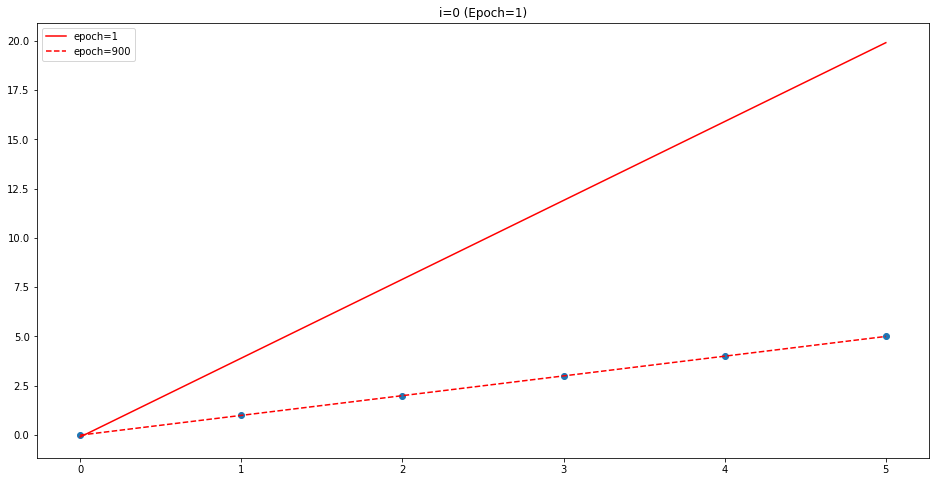

In [28]:
h_x = 4.0 * np.array(x_data) - 0.1
h_xp = 1.001 * np.array(x_data) - 0.004
plt.figure(figsize=(16, 8))
plt.plot(h_x, c='red', label='epoch=1');
plt.plot(h_xp, c='red', linestyle='--', label='epoch=900');
plt.scatter(x_data, y_data);
plt.title('i=0 (Epoch=1)');
plt.legend();

## Summary
In this post, it is explained what the hypothesis and cost function are. And using Gradient Descent with several epochs, we can get optimal weight vector and bias for representing given data. 